In [34]:
%matplotlib inline
import matplotlib.pyplot as plt
import random
from functools import partial
from math import abs

In [115]:
Point = complex

def X(point):
    return point.real

def Y(point):
    return point.imag

def distance(A, B):
    return abs(A - B)

def Data(num, seed=42):
    random.seed(seed * num)
    return [Point(random.random(), random.random()) for i in range(num)] 

def FileData(filename):
    with open(filename, "r") as f:
        data = []
        for line in f:
            coord = map(int, line.strip().split())
            data.append(Point(*coord))
        return data


In [101]:
def plot(dataset, s=3, c="k"):
    plt.scatter(map(X, dataset), map(Y, dataset), s=s, c=c)
    plt.axis('off')

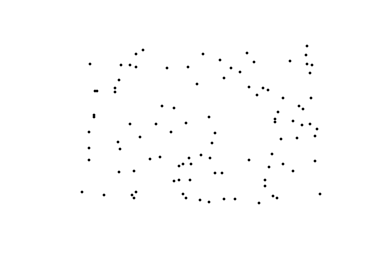

In [102]:
data = Data(100)
plot(data)

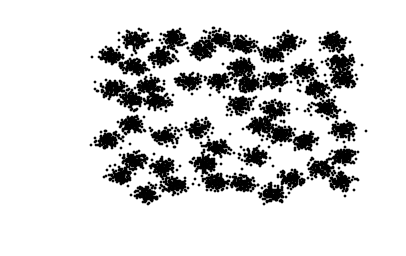

In [103]:
filedata = FileData("data.txt")
plot(filedata)

In [113]:
minX = min(map(X, filedata))
maxX = max(map(X, filedata))
minY = min(map(Y, filedata))
maxY = max(map(Y, filedata))

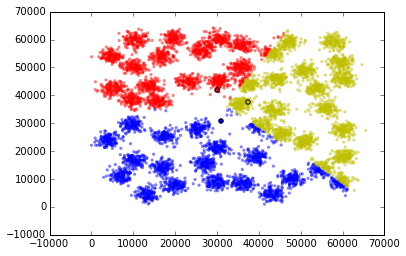

In [164]:
Sigmoid = complex

def k_means(data, num_clusters=3, seed=42):
    random.seed(seed * num_clusters)
    sigs = {Sigmoid(random.randrange(minX, maxX), random.randrange(minY, maxY)): [] for i in range(num_clusters)}
    for d in data:
        sig = min(((sig, distance(d, sig)) for sig in sigs.keys()), key=lambda t: t[1])
        sigs[sig[0]].append(d)
    return sigs

def plot_clusters(clusters):
    cols = iter(["r", "b", "y"])
    for sig, data in clusters.items():
        c = cols.next()
        plt.scatter(map(X, data), map(Y, data), s=10, c=c, alpha=0.5, edgecolor='none')
        plt.scatter([X(sig)], [Y(sig)], s=20, c=c)

plot_clusters(k_means(filedata))
    